In [7]:
from graph_plot import *
from degree_normalized_eigenvectors import *

In [8]:
# Adjacency matrix
A = np.loadtxt('../data/graph.txt')

# Degree matrix
D = np.diag(A.sum(axis=1))

# Laplacian matrix
L = D - A

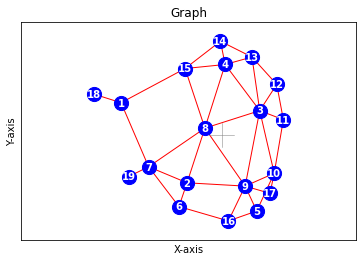

In [9]:
# Degree normalized eigenvectors
U = degree_normalized_eigenvectors(D, A, 3)

# 2D graph plot coordinates
x_coord = U[:, 0]
y_coord = U[:, 1]

graph_plot(A, x_coord, y_coord)